# Examen Argumentativo 2

## Uso de Geometría y Topología para la Ciencia de Datos

### Alumna: Ana Paola Almeida Pérez

### A00833937

### Fecha: 02/05/2024

## 1. Planteamiento del problema
En este proyecto se utiliza la base de datos "wine-clustering" que se puede enocntrar en la plataforma para ciencia de datos "Kaggle". Esta base recolecta información  de 178 muestras de diferentes tipos de vino (no se conoce la etiqueta), estos datos registran 13 características de los mismos: Alcohol, Malic_Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity	Hue, OD280 y Proline que son propiedades importantes para inferir apartir de ellas cuestiones más específicas que nos puedan interesar.

Bajo este contexto, se busca generar una clusterización que nos permita encontrar aquellas propiedades relevantes para agrupar los registros y generar análisis que nos permitan relacionar esto con la calidad de los vinos. 

Las preguntas de investigación de interés en este proyecto son:
¿De acuerdo con la clusterización, cuántos tipos de vinos hay en la base? 
¿Qué características son importantes al momento de decidir la calidad de los vinos?
¿Es posible que la calidad de los vinos siga tendencias en base al tipo de vino? 


## 2. Metodología

### Exploración de los datos
- **Conocer la calidad de los datos registrados**: Se realizará una inspección inicial de los datos para comprender su calidad y fiabilidad. Esto implica verificar la integridad de los datos, identificar posibles errores o inconsistencias, y asegurarse de que los datos estén completos y correctamente etiquetados.
  
- **Identificar características de los datos que nos permitan elegir el modo de tratar los datos posteriormente (cantidad de datos, etc)**: Se analizará la distribución de los datos, la cantidad de muestras disponibles y la distribución de las características. Esto ayudará a determinar el enfoque adecuado para el análisis posterior y a seleccionar las técnicas más apropiadas para el procesamiento de datos.

### Análisis estadístico
- **Conocer la normalidad y correlaciones de los datos**: Se realizará un análisis estadístico para comprender la distribución de los datos y las relaciones entre las diferentes características. Esto proporcionará información sobre la normalidad de los datos y las posibles correlaciones entre las variables, lo que ayudará en la selección de técnicas de análisis adecuadas.
  
- **Identificar valores atípicos**: Se llevará a cabo una identificación de valores atípicos para detectar posibles datos anómalos que puedan afectar el análisis. Esto permitirá tomar decisiones informadas sobre cómo manejar estos valores atípicos durante el procesamiento de datos.

### Preparación de los datos
- **Normalización de los datos**: Esto se realizará para garantizar que todas las características tengan la misma escala y contribuyan de manera equitativa al análisis. Esto ayudará a mejorar el rendimiento de los algoritmos de aprendizaje automático y a evitar sesgos en los resultados.
  
- **Reducción de la dimensión y el uso de PCA**: Uso de PCA (Análisis de Componentes Principales). Esto se basará en la necesidad de manejar eficientemente conjuntos de datos de alta dimensionalidad, mejorar la interpretación de los resultados y reducir el riesgo de sobreajuste en los modelos de aprendizaje automático.

### Análisis topológico
El uso de K-means en la generación de un mapper y diagramas de persistencia es crucial para capturar las complejidades estructurales de los datos. Al aplicar K-means, se puede crear un mapper que visualice de manera efectiva las relaciones y agrupaciones latentes en los datos, proporcionando así una representación topológica comprensible. Los diagramas de persistencia derivados de este mapper permiten identificar estructuras significativas, como agujeros y ciclos, que revelan información importante sobre la distribución y la conectividad de los datos. 

La proyección de los datos sobre la característica clave "Color_Intensity" es un paso estratégico que potencia la capacidad de identificar patrones y relaciones específicas relacionadas con la calidad del vino. Dado que "Color_Intensity" se ha identificado previamente como una característica relevante para la calidad del vino, proyectar los datos sobre esta variable permite centrar el análisis en aspectos específicos que podrían influir en la calidad del producto final. Esto facilita la identificación de correlaciones y tendencias relacionadas con la calidad del vino, lo que a su vez puede proporcionar información valiosa para la toma de decisiones y la optimización de procesos en la industria vitivinícola.


## 2.1 Procedimiento

### Librerías 

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import kmapper as km
import gudhi as gd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.stats import shapiro

## Dataset 

In [154]:
#Importando el dataset
url = "https://storage.googleapis.com/the_public_bucket/wine-clustering.csv"

# Lee el dataset como pandas dataframe
winedata = pd.read_csv(url)

### Dataset exploration

In [155]:
winedata.head() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Con este primer vistazo notamos los rangos en los que se manejan las mediciones, notese que el aminoácido "proline" se registra en mayores cantidades, algo similar ocurre con el magnesio, al menos las primeras 5 filas. Se continuará con la exploración. 

In [156]:
print("Dimensiones del conjunto de datos de diabetes: {}".format(winedata.shape))

Dimensiones del conjunto de datos de diabetes: (178, 13)


In [157]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Dadas las dimnsiones sabemos que hay 178 filas de las cuáles ninguna tiene contenido nulo

In [158]:
winedata.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Dado que nuestras variables son cuantitativas también nos aseguramos de que todos los registros sean valores numéricos, se observa que en efecto todos son números. 
De manera similar, al analizar cada atributo se intuye que no tendría sentido tener registros ceros en alguna de las características de los vinos, por lo que se comprueba su ausencia.

In [159]:
# Conteo de ceros
sumCeros = (winedata == 0).sum()

# Imprimir la cantidad de ceros por columna
print("Cantidad de ceros por columna:")
print(sumCeros)

Cantidad de ceros por columna:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [160]:
# Cantidad de valores únicos de cada variable
winedata.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

Los valores únicos obtenidos sugieren que hay valores repetidos, así que vale la pena revisar si alguna fila es duplicada

In [161]:
# Verificar filas duplicadas
numDuplicados = winedata.duplicated().sum()

print("Número de filas duplicadas:", numDuplicados)

Número de filas duplicadas: 0


In [162]:
winedata.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Las medias y las desviaciones estándar nos dicen mucho de las distribuciones de los datos. Por ejemplo, el alcohol tiene una media más cercana al valor máximo del conjunto lo cuál sugiere asimetría, además posee una desviación estándar que indica poca dispersión lo cuál tiene sentido con el rango tan reducido que se obtiene (entre 11.03 y 14.83), esto habla de que la cantidad de alcohol no cambia tanto entre los tipos de vinos), mientras que otros componentes como proline muestran una enorme dispersión por lo que sería interesante revisar las posibles razones para esto. Por otro lado la variable "Ash_Alcanity" tiene una media (19.49) que parece estar prácticamente a la mitad del rango de registro (10.6 - 30) o mediana, misma que se obtendrá mas adelante. 

Ya que algunas características sugieren distribuciones no-normales, no sería factible realizar modelos de regresión lineal 
o la realización de análisis de varianza ANOVA en grupos generados por un modelo de clusterización ya que no cumpliría los supuestos necesarios, en su lugar sería mejor optar por un proceso de clustering. 

In [163]:
# Mediana
print("Mediana:")
print(winedata.median())

Mediana:
Alcohol                  13.050
Malic_Acid                1.865
Ash                       2.360
Ash_Alcanity             19.500
Magnesium                98.000
Total_Phenols             2.355
Flavanoids                2.135
Nonflavanoid_Phenols      0.340
Proanthocyanins           1.555
Color_Intensity           4.690
Hue                       0.965
OD280                     2.780
Proline                 673.500
dtype: float64


### Normalidad y correlaciones

Como se mencionó anteriormente, la columna "Ash Alcalinity" tiene una mediana de 19.5 y una media de 19.49 lo cuál nos acerca a la distribución normal

Dado que tenemos más de 50 datos podemos aplicar una prueba shapiro para determinar qué variables se acercan a una distribución normal y cuáles no, aunque es necesario aclarar que al no rechazar la hipótesis tampoco se puede asegurar que los datos sigan una distribución normal, sin embargo, es bastante probable. 


**Hipótesis Nula ($H_0$):** Los datos siguen una distribución normal.

**Hipótesis Alternativa ($H_1$):** Los datos no siguen una distribución normal.

**Valor α:** 0.05

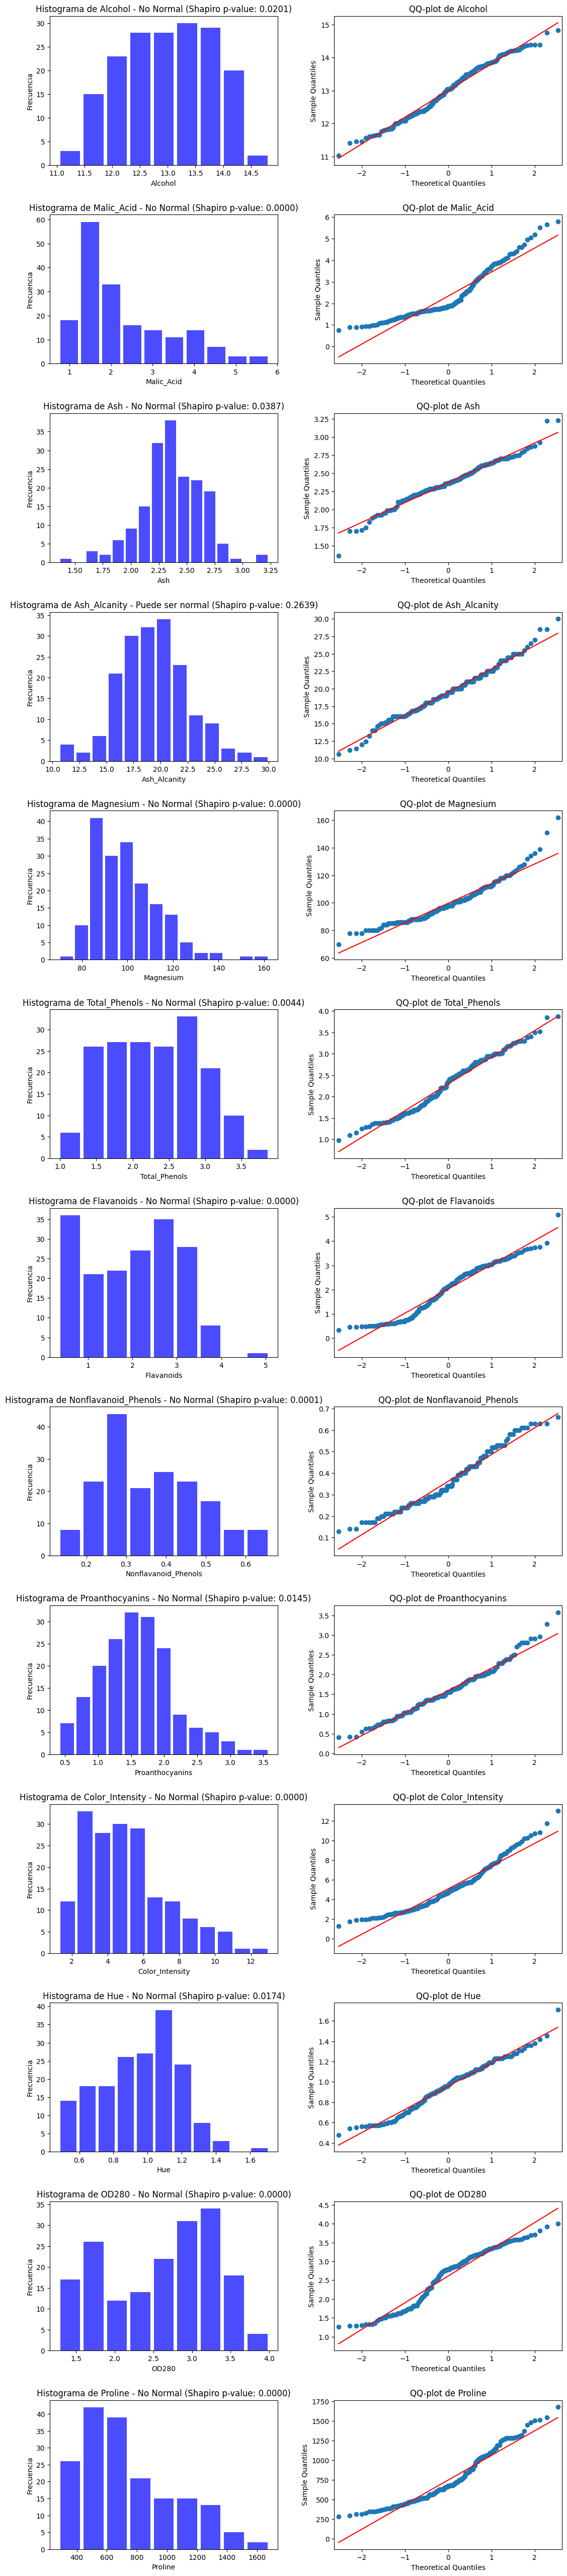

In [183]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Lista de columnas en el conjunto de datos
columnas = winedata.columns

# Nivel de significancia
alpha = 0.05

# Número de filas y columnas para el acomodo de los subgráficos
num_filas = len(columnas)
num_columnas = 2

# Configuración de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, num_filas * 4))
fig.tight_layout(pad=5.0)

# Bucle
for i, columna in enumerate(columnas):
    # Extraer los datos de la columna
    data = winedata[columna]

    # Shapiro-Wilk
    stat, p_value = shapiro(data)

    # Resultados prueba shapiro
    if p_value > alpha:
        normality_result = "Puede ser normal"
    else:
        normality_result = "No Normal"

    # Histograma
    axs[i, 0].hist(data, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
    axs[i, 0].set_title(f'Histograma de {columna} - {normality_result} (Shapiro p-value: {p_value:.4f})')
    axs[i, 0].set_xlabel(columna)
    axs[i, 0].set_ylabel('Frecuencia')

    # QQ-plot
    sm.qqplot(data, line='s', ax=axs[i, 1])
    axs[i, 1].set_title(f'QQ-plot de {columna}')

# Guardar la figura como un archivo JPG
plt.savefig('histogramas_qqplots.jpg', format='jpg')

plt.show()


Se realizaron las pruebas de las cuáles se obtiene que la única característica posiblemente con distribución nornal es tal como se veía previniendo, Ash Alcalinity.

Además añaden los histogramas y gráficas QQ-plot para visualizar mejor cómo se ajusta cada conjunto de datos 
perteneciente a cada químico presente en los vinos a lo que sería una distribuión normal.

En cuanto a los hitogramas, se oberva que todos los registros de los compuestos, excepto Ash y OD280, tienen sesgos a
la derecha lo cuál significa que los registros tienden a ser en cantidades menores ya que cuentan con un alargamiento
en la cola correspondiente a los valores altos altos, en cuanto a interpretaciones en un contexto real de los vinos se 
puede destacar lo siguiente:

- Viinos con valores extremadamente altos en las variables podrían considerarse excepcionales o únicos en términos
de características sensoriales o composición química. Esto podría ser una oportunidad d estudio para los interesados 
en el vino, como la presencia de prolina que a pesar de que en la mayoría de los vinos tiene un valor entre 500 y 700, 
hay una poca cantidad de vinos que llegan a tener un registro de más de 1600

- Para los enólogos, el conocimiento de que la mayor parte de los registros para casi todas las características 
tienden a ser valores bajos comparados con los máximos que toman menor parte, podría influir en 
decisiones sobre prácticas de vinificación, selección de uvas, o métodos de producción para equilibrar o potenciar
esas características.
- En cuanto a la revisión de estándares, Dependiendo de las regulaciones y estándares de la industria del vino,
los valores extremadamente altos podrían tener implicaciones para la conformidad con ciertos criterios de calidad 
o etiquetado.

Respecto a las gráficas QQ-plot se oberva que a pesar de todo la mayoría de las características tienen un buen ajuste a la de una distribución normal exceptuando las colas (por lo cuál podría sugerir una regresión logarítmica). Los datos correspondientes a "OD80" y principalmente los de "Flavanoids" tienen una forma más distintiva que podría amoldarse mejor a una distribución logística. 

La diferencia en la forma de estas distribuciones podría indicar que "OD80" y "Flavanoids" son características únicas o clave en el conjunto de datos de vinos. Podrían ser componentes críticos que contribuyen significativamente a la variabilidad y calidad de los vinos. Además, los flavonoides son conocidos por sus efectos antioxidantes; por lo tanto, variaciones en su concentración pueden ser de interés enológico

In [165]:
# Calcular el rango intercuartílico (IQR) para cada variable
Q1 = winedata.quantile(0.25)
Q3 = winedata.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontrar outliers
outliers = (winedata < lower_bound) | (winedata > upper_bound)

# Contar el número de outliers por variable
outliers_count = outliers.sum()

# Imprimir el número de outliers por variable
print("Número de outliers por variable:")
print(outliers_count)

Número de outliers por variable:
Alcohol                 0
Malic_Acid              3
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         4
Hue                     1
OD280                   0
Proline                 0
dtype: int64


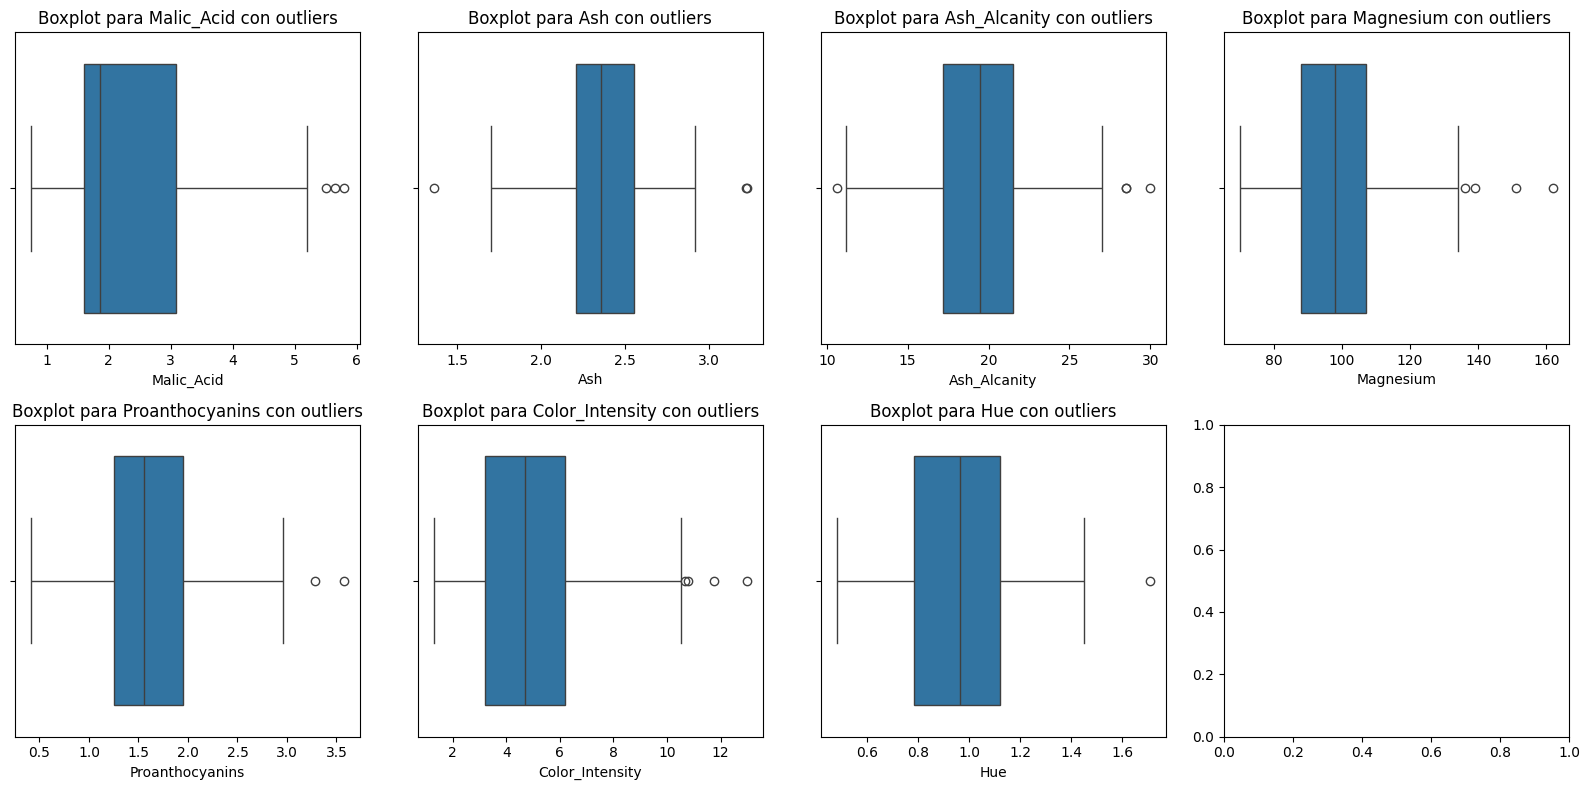

In [166]:

# Calcular el rango intercuartílico (IQR) para cada variable
Q1 = winedata.quantile(0.25)
Q3 = winedata.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontrar outliers
outliers = (winedata < lower_bound) | (winedata > upper_bound)

# Contar el número de outliers por variable
outliers_count = outliers.sum()

# Filtrar variables con outliers
variables_con_outliers = outliers_count[outliers_count > 0].index

# Crear un subplot para todas las gráficas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Iterar sobre las variables con outliers y dibujar boxplots
for i, variable in enumerate(variables_con_outliers):
    row = i // 4
    col = i % 4
    sns.boxplot(x=winedata[variable], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot para {variable} con outliers')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el subplot
plt.show()


Los datos se manejan en rangos muy distintos, al menos la columna proline, por lo que por ahora se realizan boxplots para las variables con outliers y después, en el clústering se realizará el escalamiento de los datos

Se observan algunos datos atípicos en ciertas variables, se decide no eliminarlos pues no hay certeza de que se deba a un error de registro, puede sugerir anormalidades en cuanto a la presencia de estos componentes en ciertos vinos. 

Ahora se revisará la correlación, la cuál se obtendrá con el método spearman. Dado que en la base de datos de vinos casi ninguna variable sigue una distribución normal y contiene algunos valores atípicos, el coeficiente de Spearman proporciona una medida más robusta de la relación entre las variables. Además, el coeficiente de Spearman es útil incluso cuando las relaciones entre las variables no son lineales y se prefiere una medida que capture asociaciones generales sin depender de la forma específica de la relación.

In [167]:
winedata.corr(method='spearman')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.140430,0.243722,-0.306598,0.365503,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.024203,0.103050,0.633580
Malic_Acid,0.140430,1.000000,0.230674,0.304069,0.080188,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.560265,-0.255185,-0.057466
Ash,0.243722,0.230674,1.000000,0.366374,0.361488,0.132193,0.078796,0.145583,0.024384,0.283047,-0.050183,-0.007500,0.253163
Ash_Alcanity,-0.306598,0.304069,0.366374,1.000000,-0.169558,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,-0.352507,-0.325890,-0.456090
Magnesium,0.365503,0.080188,0.361488,-0.169558,1.000000,0.246417,0.233167,-0.236786,0.173647,0.357029,0.036095,0.056963,0.507575
Total_Phenols,0.310920,-0.280225,0.132193,-0.376657,0.246417,1.000000,0.879404,-0.448013,0.666689,0.011162,0.439457,0.687207,0.419470
Flavanoids,0.294740,-0.325202,0.078796,-0.443770,0.233167,0.879404,1.000000,-0.543897,0.730322,-0.042910,0.535430,0.741533,0.429904
Nonflavanoid_Phenols,-0.162207,0.255236,0.145583,0.389390,-0.236786,-0.448013,-0.543897,1.000000,-0.384629,0.059639,-0.267813,-0.494950,-0.270112
Proanthocyanins,0.192734,-0.244825,0.024384,-0.253695,0.173647,0.666689,0.730322,-0.384629,1.000000,-0.030947,0.342795,0.554031,0.308249
Color_Intensity,0.635425,0.290307,0.283047,-0.073776,0.357029,0.011162,-0.042910,0.059639,-0.030947,1.000000,-0.418522,-0.317516,0.457096


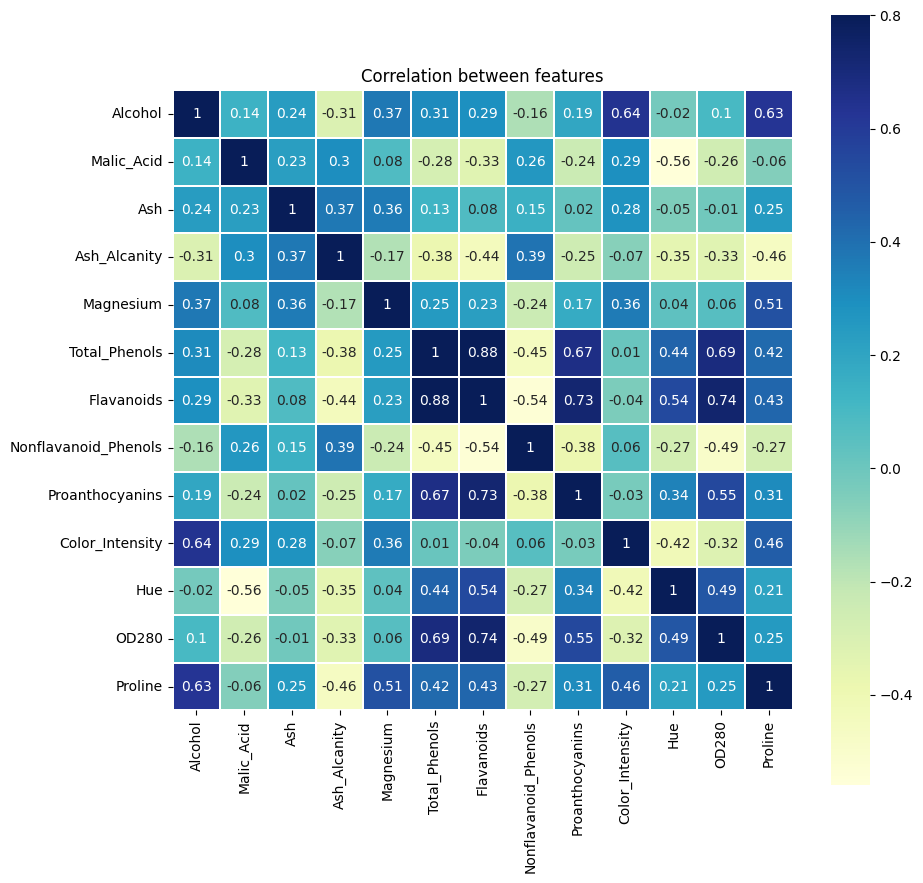

In [168]:
correlation_matrix = winedata.corr(method='spearman') .round(2)

plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

Se identifica una alta correlación (88%) entre las variables "Total_Phenols" y "Flavanoids". Entrando en contexto se oobtienen las siguientes implicaciones:

1. **Perfil de Sabor y Aroma:** Ambas variables, los fenoles totales y los flavonoides, son compuestos químicos que contribuyen significativamente al perfil de sabor y aroma de los vinos. Un aumento en la concentración de uno podría estar asociado con un aumento similar en el otro, lo que podría influir en las características organolépticas del vino.

2. **Origen de la Uva:** La correlación puede sugerir que las condiciones del suelo, el clima o la cepa de uva específica en la región de cultivo podrían estar influyendo en ambas variables de manera similar. Esto podría ser de interés para los productores de vinos que buscan comprender las características distintivas de los vinos de una región en particular.

3. **Impacto en la Salud:** Tanto los fenoles como los flavonoides se han asociado con beneficios para la salud debido a sus propiedades antioxidantes. La correlación podría tener implicaciones para la percepción de los beneficios para la salud de consumir vinos ricos en estas sustancias.

4. **Procesos de Vinificación:** La correlación podría deberse a procesos específicos de vinificación utilizados en la producción de vinos. Por ejemplo, ciertas prácticas de maceración podrían influir en ambas variables de manera similar.

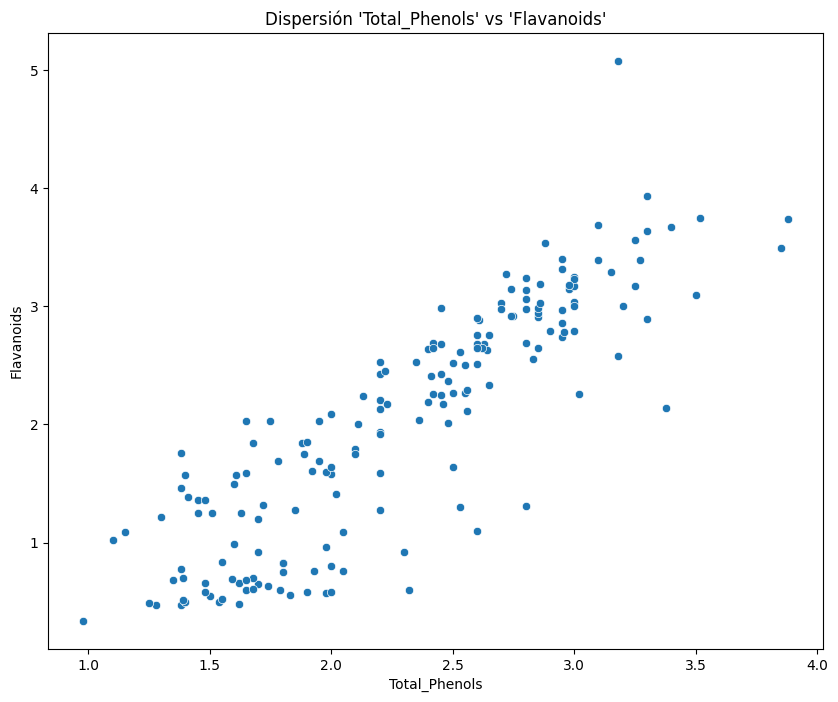

In [169]:
# Gráfico de dispersión para las variables "Total_Phenols" y "Flavanoids"
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Total_Phenols', y='Flavanoids', data=winedata)
plt.title("Dispersión 'Total_Phenols' vs 'Flavanoids'")
plt.show()

Se acompaña el resultado de la correlación con un gráfico de dispersión que sugiere una relación positiva entre estas dos variables. El hecho de que estén correlacionadas nos sugiere que se podría dismunir la dimensión de la base pues al sacar componentes principales se conservaría la información de 2 o más variables. 

## Clustering

In [170]:
# Estandarizar los datos
scaler = StandardScaler()
wineEscalado = scaler.fit_transform(winedata)

Estandarizar los datos es una práctica fundamental en el proceso de análisis de datos, especialmente en contextos donde se aplican algoritmos sensibles a la escala de las variables, como el PCA y el K-means. En el contexto de este proyecto, donde se ha utilizado el PCA para reducir la dimensionalidad de los datos y el K-means para generar un mapper, la estandarización de los datos cobra una importancia particular por las siguientes razones:

Eliminación de sesgos debidos a las escalas de las variables: La estandarización asegura que todas las características contribuyan de manera equitativa al análisis, independientemente de sus escalas originales. Esto es crucial para algoritmos como el PCA, que se basa en la covarianza entre variables y puede verse afectado por diferencias en la escala de las características. Al estandarizar los datos, se eliminan los sesgos introducidos por las diferencias en la magnitud de las variables.
Facilita la interpretación de los resultados: Al estandarizar los datos, las unidades de medida se vuelven consistentes entre todas las variables, lo que facilita la interpretación de los resultados del análisis. Esto es especialmente importante cuando se trabaja con múltiples características y se busca comprender las relaciones entre ellas de manera intuitiva.
Mejora la convergencia y la eficacia de los algoritmos: Algoritmos como el K-means pueden converger más rápidamente y ser más eficaces cuando los datos están estandarizados, ya que la distancia euclidiana entre los puntos se calcula de manera más coherente. Esto ayuda a evitar que el algoritmo se vea influenciado por características con escalas más grandes.
Aumenta la estabilidad y la reproducibilidad de los resultados: La estandarización de los datos ayuda a garantizar que los resultados del análisis sean estables y reproducibles, independientemente de la escala original de los datos o la unidad de medida utilizada. Esto es fundamental para la validez y la fiabilidad de cualquier conclusión o recomendación derivada del análisis. 

### PCA

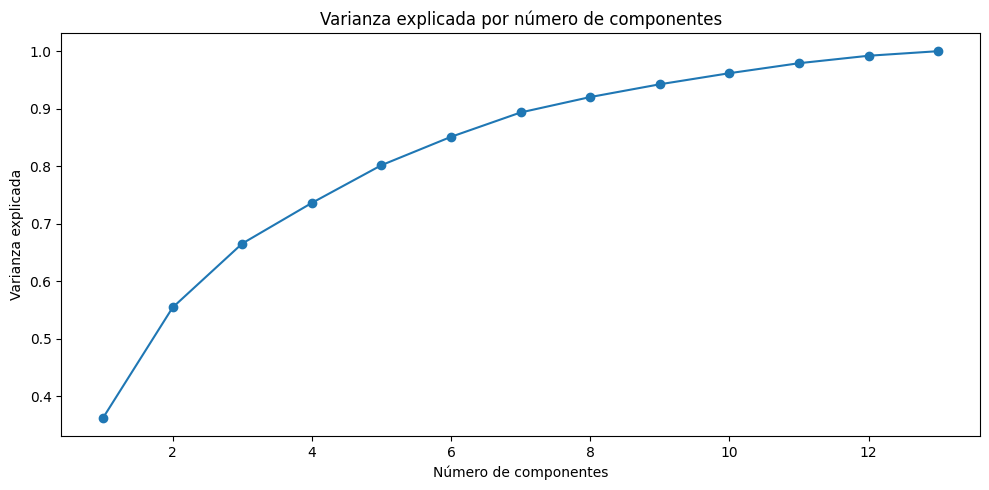

In [171]:
# Crear un rango de posibles números de componentes
num_components = np.arange(1, min(wineEscalado.shape) + 1)

# Inicializar listas para almacenar la varianza explicada y la varianza explicada acumulativa
explained_variance = []

# Calcular la varianza explicada y la varianza explicada acumulativa para cada número de componentes
for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(wineEscalado)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# Gráfica de la varianza explicadaa
plt.figure(figsize=(10, 5))

plt.plot(num_components, explained_variance, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por número de componentes')


plt.tight_layout()
plt.show()


In [172]:
# Proyección a Menos Dimensiones
pca = PCA(n_components=8)
projected_data = pca.fit_transform(wineEscalado)

# Porcentaje de varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Porcentaje total de varianza retenida
total_variance_retained = sum(variance_explained) * 100

print("Porcentaje de varianza retenida después de la proyección:", total_variance_retained)

Porcentaje de varianza retenida después de la proyección: 92.01754434577265


### Inicialización del Mapper

"Color_Intensity" es una característica clave en la evaluación de la calidad y el carácter sensorial de un vino. Esta medida representa la intensidad del color del vino, que está influenciada por la concentración de pigmentos y compuestos fenólicos presentes en la bebida. La intensidad del color puede proporcionar información sobre la madurez de las uvas utilizadas en la elaboración del vino, así como sobre los métodos de vinificación empleados.

Al proyectar el Mapper sobre "Color_Intensity", se espera capturar las variaciones en la intensidad del color entre diferentes vinos. Estas variaciones pueden reflejar diferencias en la composición química, el proceso de elaboración y el perfil sensorial de los vinos. Identificar cúmulos de vinos con características similares en términos de intensidad de color puede ser crucial para entender las preferencias del consumidor y las percepciones de calidad del vino.

Además, dado que "Color_Intensity" es una de las características más fácilmente perceptibles y cuantificables en el análisis sensorial del vino, su selección como la variable principal para la proyección del Mapper permite una interpretación más intuitiva y significativa de los resultados.

In [173]:
np.mean(np.abs(np.diff(wineEscalado[:,9])))

0.5292017132509261

Calculo la diferencia absoluta promedio entre puntos adyacentes en la columna de Color_Intensity para medir la variabilidad en mis datos y ajustar los parámetros del algoritmo Mapper. Con un valor de 0.531, elegiré un número moderado de cubos y un solapamiento también moderado para capturar la estructura de los datos de manera efectiva. Esto garantiza una representación precisa de los cúmulos de vinos en el análisis.

In [174]:
n_cubes = 5
perc_overlap = 0.3

# Graficar la Salida
# Visualizar los resultados del Mapper
mapper = km.KeplerMapper(verbose=1)
projected_data_1 = mapper.fit_transform(wineEscalado, projection=[9])

covering = km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [9]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 13)

..Projecting data using: [9]

..Scaling with: MinMaxScaler()



### K-means

d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default

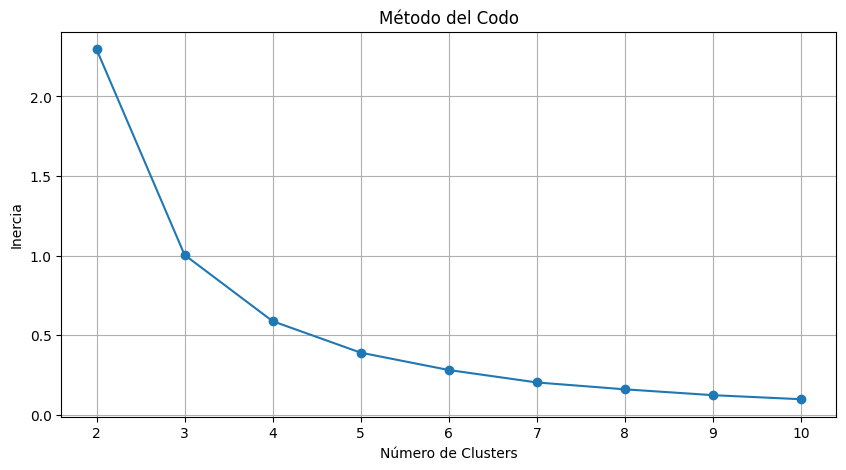

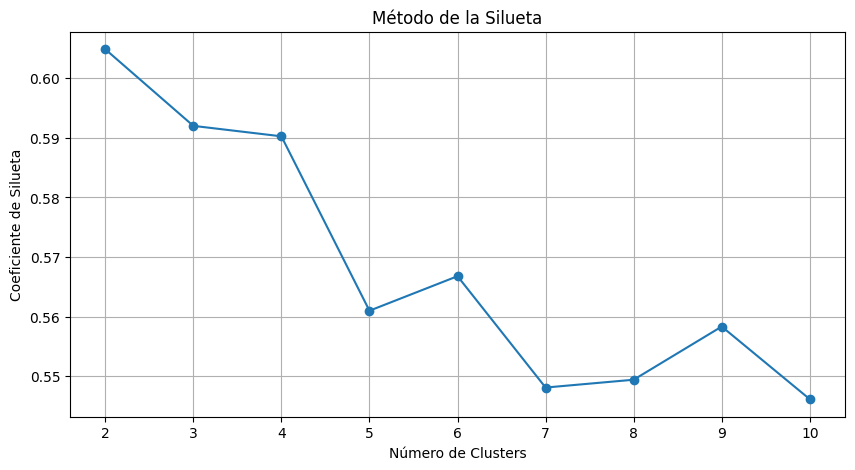

In [175]:
# Rango de número de 
min_clusters = 2
max_clusters = 10

# Lista para almacenar los valores de inercia y silueta
inertia_values = []
silhouette_scores = []

# Itera sobre el rango de número de clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Inicializa y ajusta el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(projected_data_1)
    
    # Inercia y el coeficiente de silueta
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(projected_data_1, kmeans.labels_))

# Graficar el método del codo
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Graficar el método de la silueta
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()

### Creación Mapper y visualización

Se creará con el algoritmo Kmeans con 3 clusters pues es el mejor número de clusters de acuerdo a las gráficas anteriores. 

In [176]:
clusterer = KMeans(n_clusters=3, random_state=42)
graph = mapper.map(projected_data_1, wineEscalado, clusterer=clusterer, cover=covering)
graph['meta_data']

preimage_cluster = clusterer.fit_predict(projected_data_1)

Mapping on data shaped (178, 13) using lens shaped (178, 1)

Creating 5 hypercubes.

Created 15 edges and 15 nodes in 0:00:00.141625.


d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default

In [177]:
# Visualizar el grafo
mapper.visualize(
    graph, 
    title="Mapper de datos de vino",
    color_values=preimage_cluster,  # Color por los clusters de la preimagen
    color_function_name="Preimagen Cluster",
)

Wrote visualization to: mapper_visualization_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper de datos de vino | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  

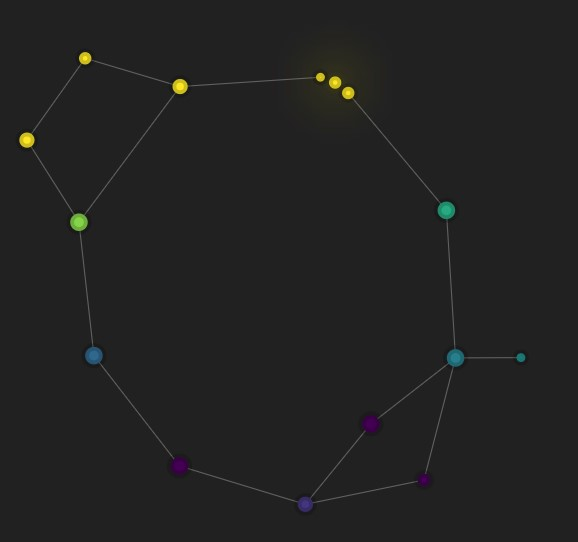

En la imagen anterior se muestra una pequeña visualización del mapper generado, cuyo summary es el siguiente:
Mapper Summary

PROJECTION
[9]

N_CUBES
5

PERC_OVERLAP
0.3

CLUSTERER
KMeans(n_clusters=3, random_state=42)

SCALER
MinMaxScaler()

NODES
15

EDGES
15

TOTAL SAMPLES
243

UNIQUE SAMPLES
178

COLOR FUNCTION
Preimagen Cluster

NODE COLOR FUNCTION
mean

### Interpretación del Mapper:

En el contexto topológico del Mapper, la proyección sobre la característica "Color_Intensity" revela una estructura subyacente en el espacio de características de los vinos. La disposición de los nodos y conexiones en el grafo del Mapper sugiere la existencia de regiones o cúmulos de vinos con perfiles de intensidad de color similares. Estas regiones topológicas representan subconjuntos de vinos que comparten características sensoriales específicas en términos de color, lo que indica una coherencia en la composición química y las propiedades organolépticas de los vinos dentro de cada grupo.

La presencia de conexiones entre los nodos del Mapper indica que, aunque los vinos dentro de un mismo cúmulo comparten similitudes en términos de intensidad de color, también pueden exhibir variaciones en otras características, como el aroma, el sabor y la textura. Estas conexiones representan transiciones suaves o gradientes entre diferentes perfiles sensoriales, lo que sugiere la existencia de relaciones complejas y sutiles entre las características del vino.

En un contexto aplicado, la estructura topológica del Mapper proporciona información valiosa para la clasificación y la evaluación de la calidad del vino. Por ejemplo, los enólogos y catadores podrían utilizar esta información para identificar grupos de vinos con perfiles sensoriales similares y entender mejor las preferencias del consumidor. Además, el análisis topológico del Mapper podría ayudar a revelar relaciones ocultas entre las características del vino y factores externos, como la región vitivinícola de origen, las prácticas de cultivo y vinificación, y las preferencias culturales de los consumidores si se analizan a estas características mencionadas de los registros que pertenecen a cierto cúmulo, en este caso los de mayor intensidad que se diferencían mucho de los otros. En última instancia, esta comprensión más profunda de la estructura y la variabilidad del vino podría informar y mejorar la toma de decisiones en la producción y comercialización del vino

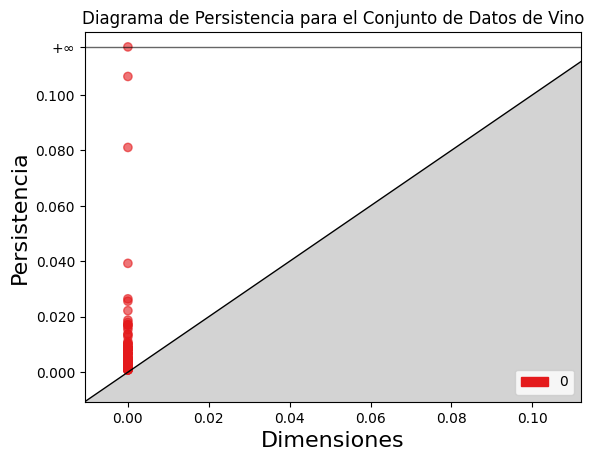

In [179]:
from scipy.spatial import distance_matrix

# Calculamos la matriz de distancia
distance_matrix = distance_matrix(projected_data_1, projected_data_1)
# Creamos el complejo de Rips
rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=2)
# Creamos el árbol de símplices
simplex_tree_X = rips_complex.create_simplex_tree(max_dimension=2)
# Calculamos el diagrama de persistencia
Barcodes_X = simplex_tree_X.persistence()
# Visualizamos el diagrama de persistencia
gd.plot_persistence_diagram(Barcodes_X)
plt.title('Diagrama de Persistencia para el Conjunto de Datos de Vino')
plt.xlabel('Dimensiones')
plt.ylabel('Persistencia')
plt.show()

